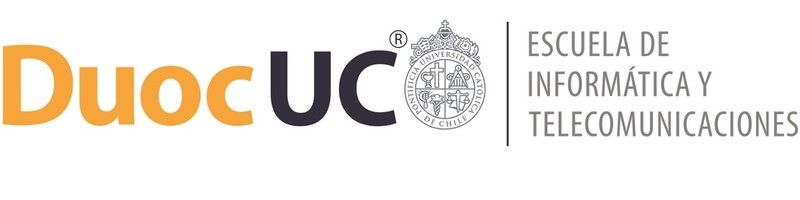

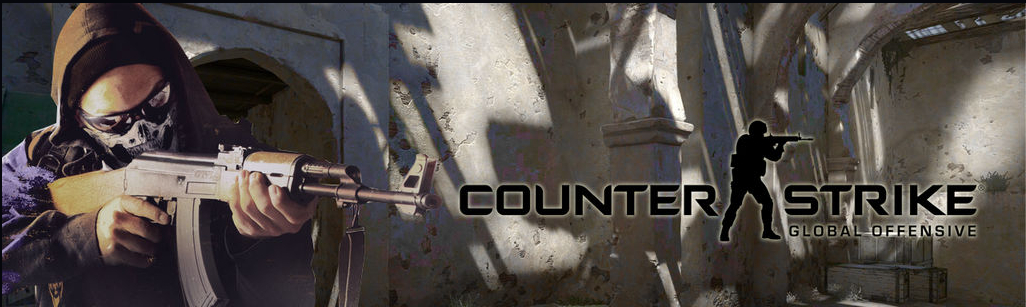

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes: 
* Adami Berríos
* Hernán Garrido

Docente:
* Giocrisrai Godoy Bonillo

Sección: FMY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO 

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan. 
 

El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  

 

En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego. 


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding 

Analizar el rendimiento de los jugadores de CSGO mediante estadísticas registradas de casi 5.000 partidas en el modo competitivo.
Se revisarán los datos obtenidos de estas replays para realizar un modelo predictivo en contraste con ciertas variables.

Para este caso se quiere determinar cómo influye la cantidad de HEADSHOTS que realiza un equipo hacia el otro en los resultados finales de la ronda y en la partida completa. En otras palabras ¿La cantidad de HEADSHOTS que realiza un equipo, determina la victoria de la ronda y de la partida?

## Fase 2: Data Understanding 

# Importación de Bibliotecas Necesarias

Para el análisis, utilizaremos `pandas` para la manipulación de datos, `matplotlib.pyplot` y `seaborn` para las visualizaciones. Estas bibliotecas proporcionan las herramientas necesarias para la carga de datos, análisis estadístico y visualización


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from IPython.display import display, HTML
import jinja2

# Carga y Revisión Inicial del Dataset

Cargamos el dataset utilizando ';' como separador. Esta revisión inicial nos permite entender la estructura básica del dataset, incluyendo el número de columnas y tipos de datos, esencial para planificar la limpieza y el análisis posterior


In [4]:
df_base = pd.read_csv('/Users/herna/Desktop/Duoc_UC/5to SEMESTRE/Fundamentos Machine Learning/ET FML/Anexo ET_demo_round_traces.csv', sep=';', encoding='utf-8', low_memory=False)

In [5]:
df_base.head(30)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0
5,605,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,850,3750,0,0,0,0
6,606,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,0,0,0,400,3750,0,0,0,0
7,607,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,0,1,0,0,800,3750,0,0,1,0
8,608,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,3,0,1,1,850,3750,3,1,0,1
9,609,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,...,2,0,2,0,850,3750,2,0,0,2


In [6]:
df_base.tail(30)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
79127,123750,de_mirage,Terrorist,1,511,3,True,True,False,False,...,0,0,0,0,1900,7300,3,1,0,1
79128,123751,de_mirage,Terrorist,1,511,3,True,True,False,False,...,0,0,0,0,1300,7300,0,0,1,0
79129,123752,de_mirage,Terrorist,1,511,3,True,True,True,False,...,0,0,0,0,1300,7300,4,2,1,2
79130,123753,de_mirage,Terrorist,1,511,3,True,True,False,False,...,0,0,0,0,1300,7300,0,0,0,0
79131,123754,de_mirage,Terrorist,1,511,3,True,True,False,False,...,0,0,0,0,1500,7300,1,0,0,1
79132,123755,de_mirage,CounterTerrorist,2,511,3,False,False,True,False,...,2,1,0,0,4600,17900,4,0,2,2
79133,123756,de_mirage,CounterTerrorist,2,511,3,False,False,True,False,...,1,0,0,0,4300,17900,4,2,0,2
79134,123757,de_mirage,CounterTerrorist,2,511,3,False,False,True,False,...,1,0,1,0,3450,17900,3,0,1,3
79135,123758,de_mirage,CounterTerrorist,2,511,3,False,False,True,False,...,0,1,0,0,2650,17900,1,0,1,0
79136,123759,de_mirage,CounterTerrorist,2,511,3,False,False,True,False,...,1,0,0,1,2900,17900,1,1,1,0


# Viendo incongruencias en el código

A simple vista, podemos observar que hay datos que no tienen sentido o están defectuosos, por ejemplo: Al momento de haber visto las celdas anteriores con los métodos "Head" y "Tail" podemos observar que la inserción de datos fue jugador por jugador, indicando, los primeros 5 Terroristas de la ronda 1, pertenecientes a la partida 4. Luego están insertados los datos de los 5 Contra Terroristas como equipo opuesto y cada 10 inserciones de jugadores, el ID de la ronda es aumentado en uno.

Dicho esto, podemos agrupar los datos para verificar a simple vista, los datos que a futuro, utilizaremos.

In [7]:
# Se agrupan en una tabla las columnas seleccionadas pertenecientes a la ronda 1 de la partida 4
agrupacion = df_base.query('MatchId == 4 and RoundId == 1')[['Team', 'RoundWinner', 'Survived', 'RoundKills', 'RoundHeadshots', 'AbnormalMatch']]
print(agrupacion)

suma_sobrevivientes = agrupacion.groupby('Team')['Survived'].sum()
suma_kills_equipo = agrupacion.groupby('Team')['RoundKills'].sum()

# Imprimir la suma de sobrevivientes por equipo
print("\nSuma de sobrevivientes por equipo:")
print(suma_sobrevivientes)
print()
# Imprimir la suma de kills por equipo
print("\nSuma de kills por equipo:")
print(suma_kills_equipo)

               Team RoundWinner  Survived  RoundKills  RoundHeadshots  \
0         Terrorist       False     False           0               0   
1         Terrorist       False     False           0               0   
2         Terrorist       False     False           0               0   
3         Terrorist       False     False           0               0   
4         Terrorist       False      True           0               0   
5  CounterTerrorist        True      True           0               0   
6  CounterTerrorist        True      True           0               0   
7  CounterTerrorist        True      True           0               0   
8  CounterTerrorist        True      True           3               1   
9  CounterTerrorist        True      True           2               2   

   AbnormalMatch  
0          False  
1          False  
2          False  
3          False  
4          False  
5          False  
6          False  
7          False  
8          False  
9     

Podemos observar que el 'jugador 8' (CT) eliminó a 3 jugadores (T), y que el 'jugador 9' (CT) eliminó a 2 jugadores (T), dando un total de eliminaciones por equipo de 5.

Pero al visualizar los datos en la tabla, observamos que apesar de que el equipo CT eliminó a 5 jugadores del equipo T, aún queda un jugador T vivo al final de la ronda...

# Análisis Preliminar de los Datos

Realizamos una revisión de los tipos de datos y la presencia de valores nulos. Además, proporcionamos estadísticas descriptivas que nos ayudan a entender las tendencias centrales y la dispersión de los datos. Esta información es crucial para identificar necesidades de limpieza y posibles áreas de interés para análisis más profundos


In [8]:
# Información de tipos de datos y valores nulos
datos_info = df_base.info()
valores_faltantes = df_base.isna().sum()

# Estadísticas descriptivas
estadisticas_desc = df_base.describe(include='all')

datos_info, valores_faltantes, estadisticas_desc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

(None,
 Unnamed: 0                     0
 Map                            0
 Team                           2
 InternalTeamId                 0
 MatchId                        0
 RoundId                        0
 RoundWinner                    0
 MatchWinner                    1
 Survived                       0
 AbnormalMatch                  0
 TimeAlive                      0
 TravelledDistance              0
 RLethalGrenadesThrown          0
 RNonLethalGrenadesThrown       0
 PrimaryAssaultRifle            0
 PrimarySniperRifle             0
 PrimaryHeavy                   0
 PrimarySMG                     0
 PrimaryPistol                  0
 FirstKillTime                  0
 RoundKills                     0
 RoundAssists                   0
 RoundHeadshots                 0
 RoundFlankKills                0
 RoundStartingEquipmentValue    0
 TeamStartingEquipmentValue     0
 MatchKills                     0
 MatchFlankKills                0
 MatchAssists                   0
 MatchH

# Limpieza de Datos

Corregimos problemas identificados en el análisis preliminar, como tipos de datos incorrectos y valores nulos. Esta etapa es fundamental para asegurar la calidad del análisis posterior, eliminando posibles fuentes de error o sesgo.

Importante mencionar que se están realizando pequeñas modificaciones en el los datos para que el análisis de estos, sea correcto y no se generen incongruencias con tipos de datos.


In [9]:
datos_limpios = df_base.drop(columns=['Unnamed: 0'])

# Manejar valores nulos
if datos_limpios['Team'].isna().sum() > 0:
# Mapeando 'InternalTeamId' a 'Team'
    def mapeo_equipo_id(row):
        if pd.isna(row['Team']):
            if row['InternalTeamId'] == 1:
                return 'Terrorist'
            elif row['InternalTeamId'] == 2:
                return 'CounterTerrorist'
        return row['Team']

# Reemplazamos los NaN de la columna 'Team' con imputación, respectivamente.
datos_limpios['Team'] = datos_limpios.apply(mapeo_equipo_id, axis=1)
# Reemplazamos los valores atípicos de la columna 'RoundWinner'
datos_limpios['RoundWinner'] = datos_limpios['RoundWinner'].replace('False4', 'False')
# Corregimos tipo de datos de la columna 'RoundWinner'
datos_limpios['RoundWinner'] = datos_limpios['RoundWinner'].map({'True': True, 'False': False})

# Ahora buscaremos mediante la correlación de variables para la columna 'MatchWinner' ya que posée datos nulos.

# Correlación para Imputación

Dado que no hay suficiente variabilidad en `MatchWinner` para correlacionar directamente con otras variables numéricas, exploraremos la posibilidad de usar variables categóricas para la imputacnió.


In [10]:
# Crear tablas de contingencia para las variables 'Map' y 'Team'
mapa_contingencia = pd.crosstab(datos_limpios['Map'], datos_limpios['MatchWinner'])
equipos_contingencia = pd.crosstab(datos_limpios['Team'], datos_limpios['MatchWinner'])

print("Contingencia por Mapa:")
print(mapa_contingencia)
print("\nContingencia por Equipo:")
print(equipos_contingencia)


Contingencia por Mapa:
MatchWinner  False  True 
Map                      
de_dust2     10070   9050
de_inferno   15769  13099
de_mirage     9804   9215
de_nuke       6374   5775

Contingencia por Equipo:
MatchWinner       False  True 
Team                          
CounterTerrorist  22004  17560
Terrorist         20013  19579


# Imputación Basada en el Análisis

Dado que el análisis indica una mayor frecuencia de partidas perdidas tanto por mapa como por equipo, imputaremos el valor nulo como 'False'.

In [11]:
# Imputamos el valor nulo en 'MatchWinner' como 'False'
datos_limpios.loc[datos_limpios['MatchWinner'].isna(), 'MatchWinner'] = 'False'

# Verificamos la imputación
valor_imputado = datos_limpios.loc[29, 'MatchWinner']  # Usamos un índice específico si conocemos la fila con el valor nulo
print(f"Valor imputado en 'MatchWinner': {valor_imputado}")


Valor imputado en 'MatchWinner': False


In [12]:
# Verificación final de los datos limpios
datos_limpios.info(), datos_limpios.isna().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Map                          79157 non-null  object 
 1   Team                         79157 non-null  object 
 2   InternalTeamId               79157 non-null  int64  
 3   MatchId                      79157 non-null  int64  
 4   RoundId                      79157 non-null  int64  
 5   RoundWinner                  79157 non-null  bool   
 6   MatchWinner                  79157 non-null  object 
 7   Survived                     79157 non-null  bool   
 8   AbnormalMatch                79157 non-null  bool   
 9   TimeAlive                    79157 non-null  object 
 10  TravelledDistance            79157 non-null  object 
 11  RLethalGrenadesThrown        79157 non-null  int64  
 12  RNonLethalGrenadesThrown     79157 non-null  int64  
 13  PrimaryAssaultRi

(None,
 Map                            0
 Team                           0
 InternalTeamId                 0
 MatchId                        0
 RoundId                        0
 RoundWinner                    0
 MatchWinner                    0
 Survived                       0
 AbnormalMatch                  0
 TimeAlive                      0
 TravelledDistance              0
 RLethalGrenadesThrown          0
 RNonLethalGrenadesThrown       0
 PrimaryAssaultRifle            0
 PrimarySniperRifle             0
 PrimaryHeavy                   0
 PrimarySMG                     0
 PrimaryPistol                  0
 FirstKillTime                  0
 RoundKills                     0
 RoundAssists                   0
 RoundHeadshots                 0
 RoundFlankKills                0
 RoundStartingEquipmentValue    0
 TeamStartingEquipmentValue     0
 MatchKills                     0
 MatchFlankKills                0
 MatchAssists                   0
 MatchHeadshots                 0
 dtype:

In [13]:
datos_limpios.head(30)

,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,...,0,0,0,0,750,4400,0,0,0,0
1,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,...,0,0,0,0,800,4400,0,0,0,0
2,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,...,0,0,0,0,1000,4400,0,0,0,0
3,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,...,0,0,0,0,850,4400,0,0,0,0
4,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,...,0,0,0,0,1000,4400,0,0,0,0
5,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,0,0,0,850,3750,0,0,0,0
6,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,0,0,0,400,3750,0,0,0,0
7,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,5.312.251.089.027.310,...,0,1,0,0,800,3750,0,0,1,0
8,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,5.312.251.089.027.310,...,3,0,1,1,850,3750,3,1,0,1
9,de_inferno,CounterTerrorist,2,4,1,True,False,True,False,5.312.251.089.027.310,...,2,0,2,0,850,3750,2,0,0,2


## Visualización de Datos

### Histograma de Muertes por Ronda
Este histograma muestra la distribución de las muertes en cada ronda del juego. Observamos que la mayoría de las rondas tienen un número bajo de muertes, indicativo de un juego táctico donde no todos los jugadores son eliminados en cada ronda. La distribución es asimétrica con una cola hacia la derecha, lo que sugiere que hay rondas con un número excepcionalmente alto de muertes, aunque estas son menos comunes. Este patrón es representativo del juego, donde rondas con alta mortalidad suelen ser momentos críticos del juego.

### Boxplot del Valor del amientoquipo al Inicio de la Ronda
El boxplot analiza el val equipamientoequipo al inicio de las rondas. Vemos una amplia distribución de valores, con algunos valores extremos que sugieren rondas donde se ha realizado una inversión significativa en equipo. La presencia de valores extremos puede indicar rondas de "all-in" donde los equipos compran todo el equipo posible, posiblemente en rondas críticas. Este gráfico es útil para entender las diferentes estrategias de inversión en equipo y cómo podrían impactar en el éxito de las rondas.

### Mapa de Calor de Correlación
El mapa de calor muestra la correlación entre varias variables importantes. Notablemente, hay una correlación positiva entre las muertes y los tiros a la cabeza, lo que es esperado ya que los tiros a la cabeza son una manera eficaz de asegurar muertes. Las bajas correlaciones entre el valor amientoel equipo y los resultados de las rondas sugieren que inv ásamientamientoen equipo no garantiza automáticamente el éxito, destacando la importancia de la habilidad y la táctica sobre el mero gasto económico. Este mapa es representativo de las dinámicas complejas del juego y proporciona una base para investigaciones más detalladas sobre las estrategias  juego.



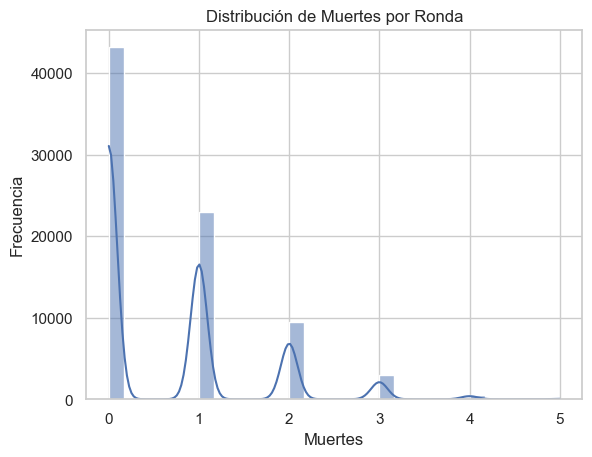

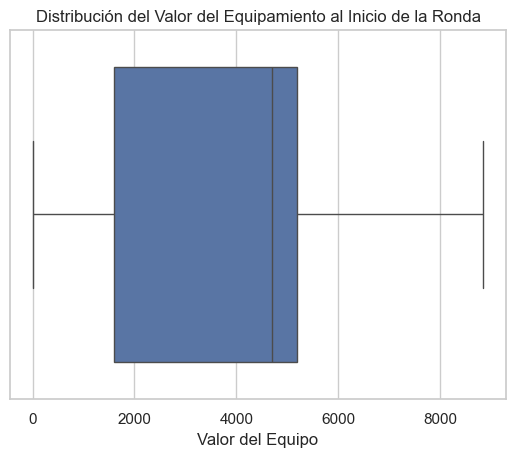

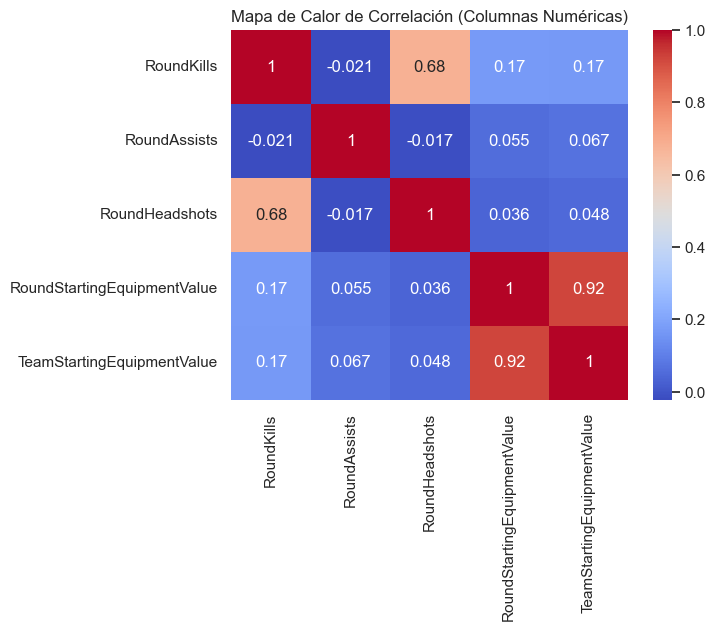

In [14]:
# Configuración de estilos de visualización
sns.set(style="whitegrid")

# Histograma de RoundKills
sns.histplot(datos_limpios['RoundKills'], bins=30, kde=True)
plt.title('Distribución de Muertes por Ronda')
plt.xlabel('Muertes')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de RoundStartingEquipmentValue
sns.boxplot(x=datos_limpios['RoundStartingEquipmentValue'])
plt.title('Distribución del Valor del Equipamiento al Inicio de la Ronda')
plt.xlabel('Valor del Equipo')
plt.show()

# Heatmap de correlación
corr_matrix = datos_limpios[['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación (Columnas Numéricas)')
plt.show()

# Análisis de la Efectividad de Tiros a la Cabeza por Equipo

Este gráfico de barras compara la media de tiros a la cabeza realizados por los equipos Terroristas y Antiterroristas. Una diferencia significativa en este valor podría indicar una disparidad en las habilidades o estrategias de tiro entre los equipos. Este análisis es crucial para entender si el tipo de equipo influye en la precisión y efectividad durante el juego, y podría ser indicativo de necesidades de balance entre los equipos si una disparidad es demasiado grande.

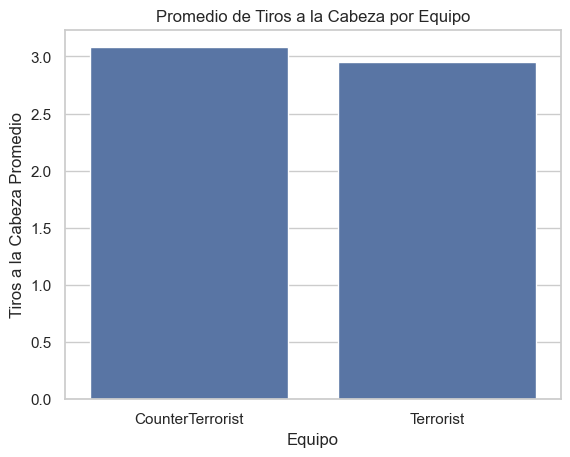

In [15]:
# Creación de un gráfico de barras para comparar los tiros a la cabeza por equipo
headshots_por_equipo = datos_limpios.groupby('Team')['RoundHeadshots'].mean().reset_index()

# Multiplicar los datos por 10 antes de calcular el promedio para que el valor de salida en el eje y, sean valores enteros
headshots_por_equipo['RoundHeadshots'] *= 10

sns.barplot(x='Team', y='RoundHeadshots', data=headshots_por_equipo)
plt.title('Promedio de Tiros a la Cabeza por Equipo')
plt.xlabel('Equipo')
plt.ylabel('Tiros a la Cabeza Promedio')
plt.show()

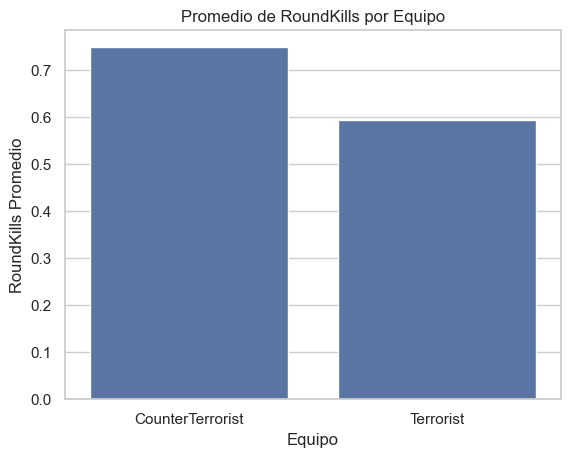

In [16]:
kills_por_equipo = datos_limpios.groupby('Team')['RoundKills'].mean().reset_index()
sns.barplot(x='Team', y='RoundKills', data=kills_por_equipo)
plt.title('Promedio de RoundKills por Equipo')
plt.xlabel('Equipo')
plt.ylabel('RoundKills Promedio')
plt.show()

# Relación Entre la Supervivencia de los Jugadores y el Éxito en las Rondas

Este gráfico exploraría cómo la supervivencia de los jugadores se correlaciona con el éxito de sus equipos en las rondas. Esperaríamos ver que la supervivencia juega un papel crucial, ya que los jugadores vivos pueden continuar influyendo en el resultado de la ronda a través de acciones ofensivas o defensivas. Una correlación positiva significaría que los equipos cuyos jugadores sobreviven tienden a ganar más rondas, lo que es intuitivo en un juego donde la eliminación de jugadores enemigos es un objetivo clave.


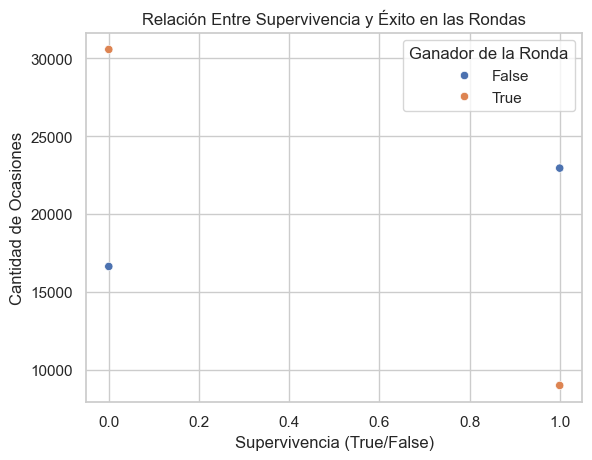

In [17]:
# Crear un gráfico de puntos para analizar la relación entre supervivencia y victorias en las rondas
sobrevivencia = datos_limpios.groupby(['RoundWinner', 'Survived']).size().reset_index(name='Count')
sns.scatterplot(data=sobrevivencia, x='Survived', y='Count', hue='RoundWinner')
plt.title('Relación Entre Supervivencia y Éxito en las Rondas')
plt.xlabel('Supervivencia (True/False)')
plt.ylabel('Cantidad de Ocasiones')
plt.legend(title='Ganador de la Ronda', loc='upper right')
plt.show()

# Impacto de las Tácticas de Flanqueo en los Resultados de las Rondas

Este gráfico mostraría cómo las tácticas de flanqueo (flank kills) influyen en el éxito de las rondas. Las tácticas de flanqueo pueden proporcionar ventajas tácticas significativas, desestabilizando las formaciones enemigas y permitiendo ataques sorpresa. Una tendencia positiva en este gráfico sugeriría que las rondas donde se logran más flank kills tienden a ser ganadas por el equipo ejecutor, destacando la efectividad de las tácticas de flanqueo en el juego.


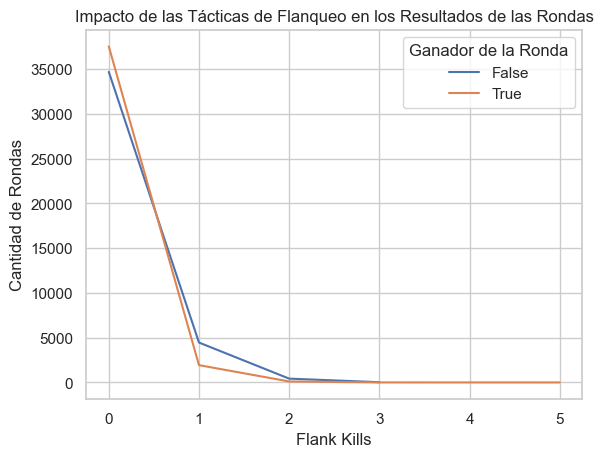

In [18]:
# Análisis de la influencia de flank kills en el resultado de las rondas
impacto_flanqueo = datos_limpios.groupby(['RoundWinner', 'RoundFlankKills']).size().reset_index(name='Count')
sns.lineplot(data=impacto_flanqueo, x='RoundFlankKills', y='Count', hue='RoundWinner')
plt.title('Impacto de las Tácticas de Flanqueo en los Resultados de las Rondas')
plt.xlabel('Flank Kills')
plt.ylabel('Cantidad de Rondas')
plt.legend(title='Ganador de la Ronda')
plt.show()

# Contraste de cantidad de tiros a la cabeza por partida

Este es el punto crítico de análisis a realizar debido que utilizamos la variable más importante según nuestro contexto de negocio: "MatchHeadshots". En este gráfico podemos contrastar la cantidad de tiros a la cabeza totales por partida completada en el juego.

En el gráfico se aprecian una cantidad aproximada de 500 partidas, siendo varias de ellas, valores outliers debido a la cantidad exagerada de tiros a la cabeza (como por ejemplo 25 tiros en la cabeza en una sola partida) en comparación a la mediana y media aritmética.

Podemos inferir que en estas partidas pudo haber intervenido un hacker, o simplemente, fue una partida en donde jugadores de ambos equipos comenzaron a desviarse del objetivo principal del juego y comenzar a darse tiros en la cabeza de forma preparada y anticipada.


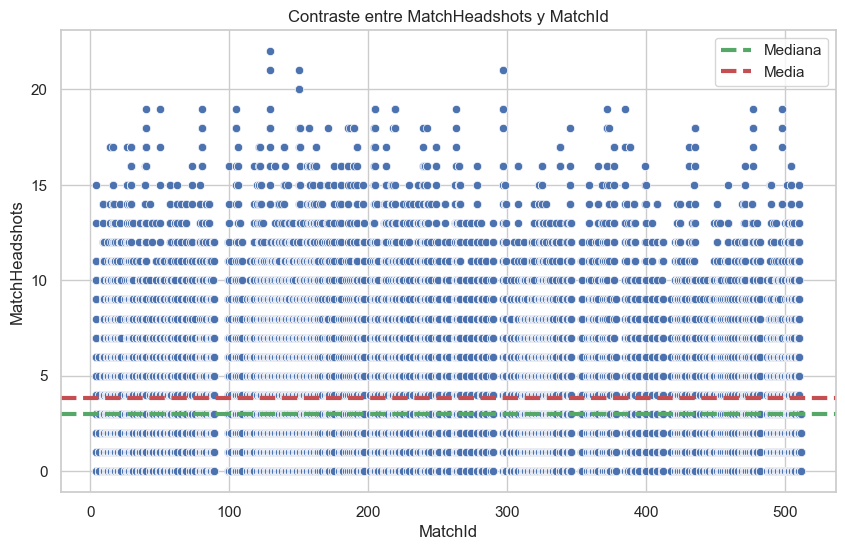

In [19]:
mediana_match_headshots = df_base['MatchHeadshots'].median()
media_match_headshots = df_base['MatchHeadshots'].mean()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MatchId', y='MatchHeadshots', data=df_base)
plt.title('Contraste entre MatchHeadshots y MatchId')
plt.xlabel('MatchId')
plt.ylabel('MatchHeadshots')

# Trazar la línea de la mediana en color azul y línea punteada
plt.axhline(y=mediana_match_headshots, color='g', linestyle='--', label='Mediana', linewidth=3)

# Trazar la línea de la media aritmética en color rojo y línea punteada
plt.axhline(y=media_match_headshots, color='r', linestyle='--', label='Media', linewidth=3)

plt.legend()
plt.show()

# Contraste de cantidad de eliminaciones por partida

Al igual que el gráfico anterior, para este contexto de negocio tenemos que contrastar la variable de eliminaciones totales por partidas para tener claro de que no hayan datos afectados por hackers o por arreglos internos de los jugadores, es decir, tenemos que analizar en lo posible, partidas que se hayan jugado de forma normal y regidas a las reglas naturales del juego. 

Para este gráfico, los datos se han agrupado por equipos.

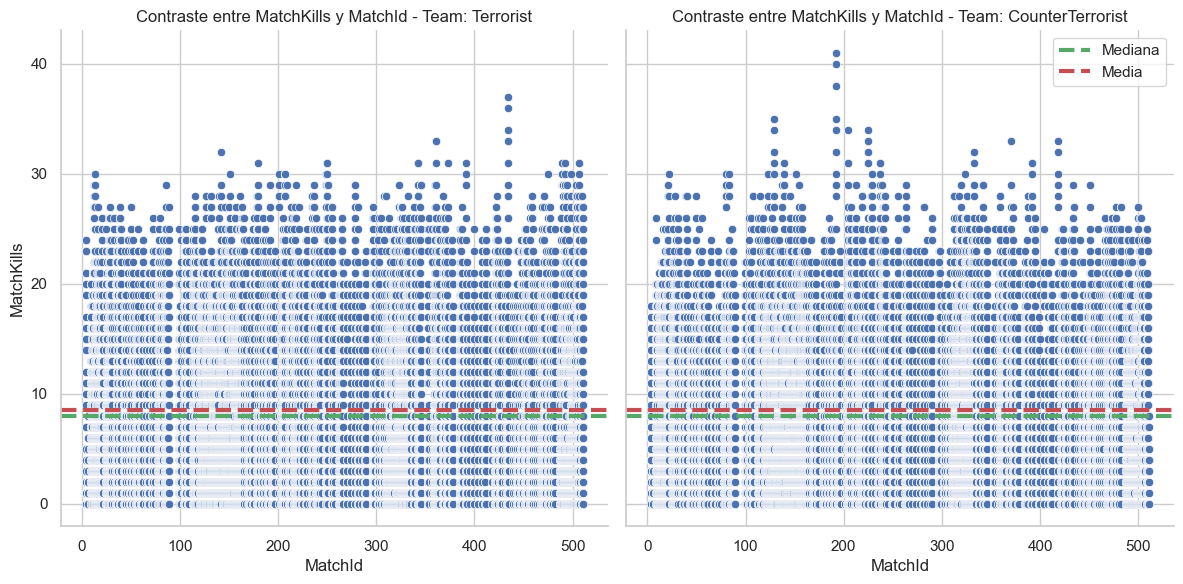

In [20]:
# Calcular la mediana y la media aritmética de la variable 'MatchKills'
mediana_match_kills = df_base['MatchKills'].median()
media_match_kills = df_base['MatchKills'].mean()

# Crear dos gráficos separados por la columna "Team"
g = sns.FacetGrid(df_base, col="Team", height=6)
g.map_dataframe(sns.scatterplot, x='MatchId', y='MatchKills')

# Trazar la línea de la mediana en color azul y línea punteada
g.map(plt.axhline, y=mediana_match_kills, color='g', linestyle='--', linewidth=3, label='Mediana')

# Trazar la línea de la media aritmética en color rojo y línea punteada
g.map(plt.axhline, y=media_match_kills, color='r', linestyle='--', linewidth=3, label='Media')

# Ajustar los títulos y etiquetas
g.set_titles('Contraste entre MatchKills y MatchId - Team: {col_name}')
g.set_axis_labels('MatchId', 'MatchKills')

plt.legend()
plt.show()

## Fase 3: Data Preparation 

# Selección de variables a utilizar para la futura creación de un modelo

Durante esta etapa, se corrigen errores, se unen datos de múltiples fuentes, se seleccionan y transforman variables relevantes, y se reduce la dimensionalidad del conjunto de datos. La calidad de los resultados posteriores depende en gran medida del trabajo realizado en esta fase, destacando su importancia crítica en la obtención de insights significativos a partir de los datos.

En este caso vamos a utilizar 10 variables de las entregadas en el total del DataSet inicial, verificaremos el tipo de dato y haremos las preparaciones pertinentes para poder trabajar de manera eficiente y efectiva en esta fase.

# Observaciones iniciales

Como podemos observar en la tabla "info" a continuación, tenemos las primeras 4 columnas con un tipo de dato "Object" el cual para la correcta manipulación del dataset, tenemos que reemplazarlos por números.

In [21]:
df = df_base.loc[:,['Map','Team', 'InternalTeamId', 'RoundWinner', 'MatchWinner', 'Survived', 'RoundId', 'MatchId', 'RoundKills', 'RoundAssists','MatchKills','MatchAssists', 'RoundHeadshots', 'MatchHeadshots']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Map             79157 non-null  object
 1   Team            79155 non-null  object
 2   InternalTeamId  79157 non-null  int64 
 3   RoundWinner     79157 non-null  object
 4   MatchWinner     79156 non-null  object
 5   Survived        79157 non-null  bool  
 6   RoundId         79157 non-null  int64 
 7   MatchId         79157 non-null  int64 
 8   RoundKills      79157 non-null  int64 
 9   RoundAssists    79157 non-null  int64 
 10  MatchKills      79157 non-null  int64 
 11  MatchAssists    79157 non-null  int64 
 12  RoundHeadshots  79157 non-null  int64 
 13  MatchHeadshots  79157 non-null  int64 
dtypes: bool(1), int64(9), object(4)
memory usage: 7.9+ MB


# Eliminación de Outliers

Cómo vimos en la Fase 2 de exploración y entendimiento de los datos, habían partidas que tenían valores que se alejaban demasiado de la mediana del conjunto y se puede inferir que esas partidas pueden afectar la manipulación de los datos en un futuro modelo.

Para este caso, nos desharemos de las partidas en donde los valores de tiros a la cabeza, eliminaciones por partida no vayan de acuerdo al valor de la mediana y también, de las partidas que hayan tenido 0 tiros en la cabeza.

# Eliminamos las partidas completas en donde los valores de MatchHeadshots sean valores atípicos

In [22]:
# Encuentra el ID correspondiente donde "MatchHeadshots" es mayor o igual a 20
id_match_headshots_mayor_igual_20 = df.loc[df['MatchHeadshots'] >= 20, 'MatchId']

# Filtra todas las filas con ese ID en la columna "MatchId"
filas_a_borrar = df[df['MatchId'].isin(id_match_headshots_mayor_igual_20)]

# Elimina esas filas del DataFrame
df = df.drop(filas_a_borrar.index)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 78347 entries, 0 to 79156
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Map             78347 non-null  object
 1   Team            78345 non-null  object
 2   InternalTeamId  78347 non-null  int64 
 3   RoundWinner     78347 non-null  object
 4   MatchWinner     78346 non-null  object
 5   Survived        78347 non-null  bool  
 6   RoundId         78347 non-null  int64 
 7   MatchId         78347 non-null  int64 
 8   RoundKills      78347 non-null  int64 
 9   RoundAssists    78347 non-null  int64 
 10  MatchKills      78347 non-null  int64 
 11  MatchAssists    78347 non-null  int64 
 12  RoundHeadshots  78347 non-null  int64 
 13  MatchHeadshots  78347 non-null  int64 
dtypes: bool(1), int64(9), object(4)
memory usage: 8.4+ MB


# Revisamos el nuevo gráfico de MatchHeadshots y MatchId

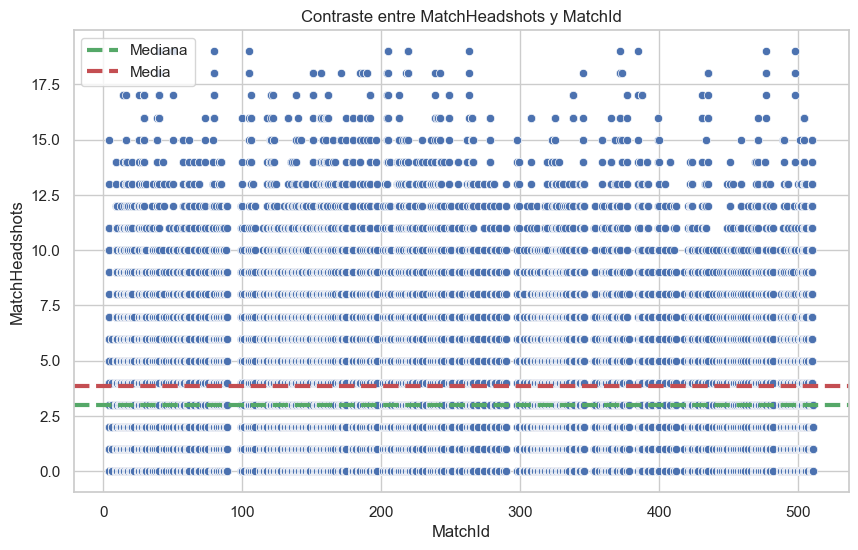

In [23]:
mediana_match_headshots = df['MatchHeadshots'].median()
media_match_headshots = df['MatchHeadshots'].mean()

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MatchId', y='MatchHeadshots', data=df)
plt.title('Contraste entre MatchHeadshots y MatchId')
plt.xlabel('MatchId')
plt.ylabel('MatchHeadshots')

# Trazar la línea de la mediana en color azul y línea punteada
plt.axhline(y=mediana_match_headshots, color='g', linestyle='--', label='Mediana', linewidth=3)

# Trazar la línea de la media aritmética en color rojo y línea punteada
plt.axhline(y=media_match_headshots, color='r', linestyle='--', label='Media', linewidth=3)

plt.legend()
plt.show()

# Eliminamos las partidas completas en donde los valores de MatchKills sean valores atípicos

In [24]:
# Encuentra el ID correspondiente donde "MatchKills" es mayor o igual a 30
id_match_kills_mayor_igual_30 = df.loc[df['MatchKills'] >= 30, 'MatchId']

# Filtra todas las filas con ese ID en la columna "MatchId"
filas_a_borrar = df[df['MatchId'].isin(id_match_kills_mayor_igual_30)]

# Elimina esas filas del DataFrame
df = df.drop(filas_a_borrar.index)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69547 entries, 0 to 79156
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Map             69547 non-null  object
 1   Team            69545 non-null  object
 2   InternalTeamId  69547 non-null  int64 
 3   RoundWinner     69547 non-null  object
 4   MatchWinner     69546 non-null  object
 5   Survived        69547 non-null  bool  
 6   RoundId         69547 non-null  int64 
 7   MatchId         69547 non-null  int64 
 8   RoundKills      69547 non-null  int64 
 9   RoundAssists    69547 non-null  int64 
 10  MatchKills      69547 non-null  int64 
 11  MatchAssists    69547 non-null  int64 
 12  RoundHeadshots  69547 non-null  int64 
 13  MatchHeadshots  69547 non-null  int64 
dtypes: bool(1), int64(9), object(4)
memory usage: 7.5+ MB


# Revisamos el nuevo gráfico de MatchKills y MatchId

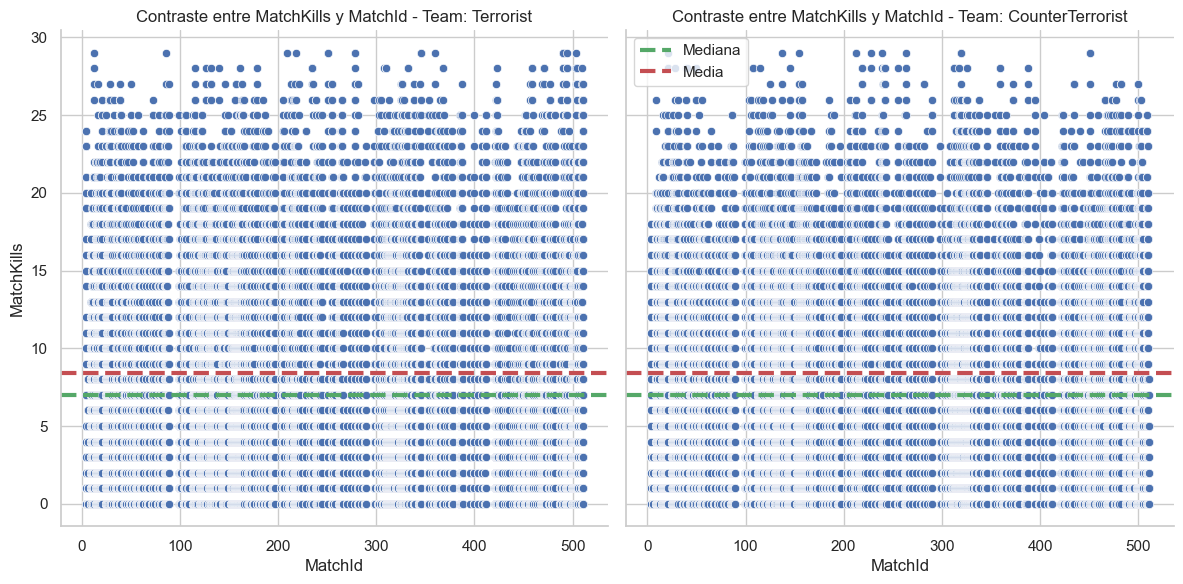

In [25]:
# Calcular la mediana y la media aritmética de la variable 'MatchKills'
mediana_match_kills = df['MatchKills'].median()
media_match_kills = df['MatchKills'].mean()

# Crear dos gráficos separados por la columna "Team"
g = sns.FacetGrid(df, col="Team", height=6)
g.map_dataframe(sns.scatterplot, x='MatchId', y='MatchKills')

# Trazar la línea de la mediana en color azul y línea punteada
g.map(plt.axhline, y=mediana_match_kills, color='g', linestyle='--', linewidth=3, label='Mediana')

# Trazar la línea de la media aritmética en color rojo y línea punteada
g.map(plt.axhline, y=media_match_kills, color='r', linestyle='--', linewidth=3, label='Media')

# Ajustar los títulos y etiquetas
g.set_titles('Contraste entre MatchKills y MatchId - Team: {col_name}')
g.set_axis_labels('MatchId', 'MatchKills')

plt.legend()
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69547 entries, 0 to 79156
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Map             69547 non-null  object
 1   Team            69545 non-null  object
 2   InternalTeamId  69547 non-null  int64 
 3   RoundWinner     69547 non-null  object
 4   MatchWinner     69546 non-null  object
 5   Survived        69547 non-null  bool  
 6   RoundId         69547 non-null  int64 
 7   MatchId         69547 non-null  int64 
 8   RoundKills      69547 non-null  int64 
 9   RoundAssists    69547 non-null  int64 
 10  MatchKills      69547 non-null  int64 
 11  MatchAssists    69547 non-null  int64 
 12  RoundHeadshots  69547 non-null  int64 
 13  MatchHeadshots  69547 non-null  int64 
dtypes: bool(1), int64(9), object(4)
memory usage: 7.5+ MB


# Revisamos que las variables que son objetos, tengan valores coherentes

De lo contrario, estas variables deben ser tratadas antes de ser convertidas en tipo de dato numérico

In [27]:
df.Map.unique()

array(['de_inferno', 'de_nuke', 'de_mirage', 'de_dust2'], dtype=object)

# Variable Team

En esta variable, nos damos cuenta de que se ha encontrado un tipo de dato no númerico o nulo en dos filas, por lo tanto, la borraremos.

In [28]:
df.Team.unique()

array(['Terrorist', 'CounterTerrorist', nan], dtype=object)

In [29]:
df.InternalTeamId.unique()

array([1, 2], dtype=int64)

In [30]:
df.head(60)

,Map,Team,InternalTeamId,RoundWinner,MatchWinner,Survived,RoundId,MatchId,RoundKills,RoundAssists,MatchKills,MatchAssists,RoundHeadshots,MatchHeadshots
0,de_inferno,Terrorist,1,False,True,False,1,4,0,0,0,0,0,0
1,de_inferno,Terrorist,1,False,True,False,1,4,0,0,0,0,0,0
2,de_inferno,Terrorist,1,False,True,False,1,4,0,0,0,0,0,0
3,de_inferno,Terrorist,1,False,True,False,1,4,0,0,0,0,0,0
4,de_inferno,Terrorist,1,False,True,True,1,4,0,0,0,0,0,0
5,de_inferno,CounterTerrorist,2,True,False,True,1,4,0,0,0,0,0,0
6,de_inferno,CounterTerrorist,2,True,False,True,1,4,0,0,0,0,0,0
7,de_inferno,CounterTerrorist,2,True,False,True,1,4,0,1,0,1,0,0
8,de_inferno,CounterTerrorist,2,True,False,True,1,4,3,0,3,0,1,1
9,de_inferno,CounterTerrorist,2,True,False,True,1,4,2,0,2,0,2,2


In [31]:
df.tail(60)

,Map,Team,InternalTeamId,RoundWinner,MatchWinner,Survived,RoundId,MatchId,RoundKills,RoundAssists,MatchKills,MatchAssists,RoundHeadshots,MatchHeadshots
79097,de_inferno,CounterTerrorist,1,False,False,True,30,510,1,0,17,5,1,9
79098,de_inferno,CounterTerrorist,1,False,False,False,30,510,0,0,18,0,0,9
79099,de_inferno,CounterTerrorist,1,False,False,False,30,510,1,1,19,4,0,11
79100,de_inferno,CounterTerrorist,1,False,False,True,30,510,0,0,23,7,0,11
79101,de_inferno,CounterTerrorist,1,False,False,True,30,510,3,0,20,3,2,13
79102,de_inferno,Terrorist,2,True,False,False,30,510,1,0,27,7,0,15
79103,de_inferno,Terrorist,2,True,False,False,30,510,0,0,12,8,0,8
79104,de_inferno,Terrorist,2,True,False,False,30,510,0,0,12,3,0,5
79105,de_inferno,Terrorist,2,True,False,False,30,510,0,1,24,6,0,12
79106,de_inferno,Terrorist,2,True,False,True,30,510,1,0,21,4,0,13


In [32]:
# Manejar valores nulos
if df['Team'].isna().sum() > 0:
# Mapeando 'InternalTeamId' a 'Team'
    def mapeo_equipo_id(row):
        if pd.isna(row['Team']):
            if row['InternalTeamId'] == 1:
                return 'Terrorist'
            elif row['InternalTeamId'] == 2:
                return 'CounterTerrorist'
        return row['Team']

# Reemplazamos los NaN de la columna 'Team' con imputación, respectivamente.
df['Team'] = df.apply(mapeo_equipo_id, axis=1)

In [33]:
df.head(60)

,Map,Team,InternalTeamId,RoundWinner,MatchWinner,Survived,RoundId,MatchId,RoundKills,RoundAssists,MatchKills,MatchAssists,RoundHeadshots,MatchHeadshots
0,de_inferno,Terrorist,1,False,True,False,1,4,0,0,0,0,0,0
1,de_inferno,Terrorist,1,False,True,False,1,4,0,0,0,0,0,0
2,de_inferno,Terrorist,1,False,True,False,1,4,0,0,0,0,0,0
3,de_inferno,Terrorist,1,False,True,False,1,4,0,0,0,0,0,0
4,de_inferno,Terrorist,1,False,True,True,1,4,0,0,0,0,0,0
5,de_inferno,CounterTerrorist,2,True,False,True,1,4,0,0,0,0,0,0
6,de_inferno,CounterTerrorist,2,True,False,True,1,4,0,0,0,0,0,0
7,de_inferno,CounterTerrorist,2,True,False,True,1,4,0,1,0,1,0,0
8,de_inferno,CounterTerrorist,2,True,False,True,1,4,3,0,3,0,1,1
9,de_inferno,CounterTerrorist,2,True,False,True,1,4,2,0,2,0,2,2


# Variable RoundWinner

En esta variable, nos damos cuenta de que se ha encontrado un valor mal escrito, y además, en un tipo de dato incorrecto, estos datos deberían ser guardados en un tipo de dato booleano.

In [34]:
df.RoundWinner.unique()

array(['False', 'True', 'False4'], dtype=object)

In [35]:
ronda = df.groupby('RoundWinner')

for ganador, contador in ronda:
    print("Ganador:", ganador if pd.notna(ganador) else "NaN")
    print("Número de filas:", len(contador))
    print()

Ganador: False
Número de filas: 34783

Ganador: False4
Número de filas: 1

Ganador: True
Número de filas: 34763



# Variable MatchWinner

En esta variable, nos damos cuenta que ocurre una combinación de las dos últimas dos variables revisadas, es decir, hay un valor nulo entremedio, y además, en un tipo de dato equivocado.

In [36]:
df.MatchWinner.unique()

array([True, False, nan], dtype=object)

In [37]:
partida = df.groupby('MatchWinner', dropna=False)

for ganador, contador in partida:
    print("Ganador:", ganador if pd.notna(ganador) else "NaN")
    print("Número de filas:", len(contador))
    print()

Ganador: False
Número de filas: 36177

Ganador: True
Número de filas: 33369

Ganador: NaN
Número de filas: 1



# Reemplazo de valores Object a Numéricos

Reemplazar los tipos de datos en los conjuntos de datos por tipos numéricos es esencial para garantizar la compatibilidad con algoritmos de machine learning, mejorar la eficiencia computacional, facilitar la visualización y el análisis de datos, y promover la consistencia y uniformidad en el tratamiento de los datos. Esta transformación permite una manipulación más eficaz de los datos, facilitando así la obtención de mejores resultados en el análisis y modelado de datos.

In [38]:
#SE REEMPLAZARÁN LOS VALORES

df.Map.replace({"de_inferno":1, "de_nuke":2, "de_mirage":3, "de_dust2":4}, inplace=True)


df.Team.replace({"Terrorist":0, "CounterTerrorist":1}, inplace=True)

df['MatchWinner'] = df['MatchWinner'].fillna(2) #Remplaza el valor nulo por 2
df.MatchWinner.replace({True:1, False:0}, inplace=True)


df.Survived.replace({True:1, False:0}, inplace=True)


df.RoundWinner.replace({"False":0, "True":1, "False4":0, True:1, False:0}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69547 entries, 0 to 79156
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Map             69547 non-null  int64
 1   Team            69547 non-null  int64
 2   InternalTeamId  69547 non-null  int64
 3   RoundWinner     69547 non-null  int64
 4   MatchWinner     69547 non-null  int64
 5   Survived        69547 non-null  int64
 6   RoundId         69547 non-null  int64
 7   MatchId         69547 non-null  int64
 8   RoundKills      69547 non-null  int64
 9   RoundAssists    69547 non-null  int64
 10  MatchKills      69547 non-null  int64
 11  MatchAssists    69547 non-null  int64
 12  RoundHeadshots  69547 non-null  int64
 13  MatchHeadshots  69547 non-null  int64
dtypes: int64(14)
memory usage: 8.0 MB


C:\Users\herna\AppData\Local\Temp\ipykernel_5008\1832400820.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Map.replace({"de_inferno":1, "de_nuke":2, "de_mirage":3, "de_dust2":4}, inplace=True)
C:\Users\herna\AppData\Local\Temp\ipykernel_5008\1832400820.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

## Generar un ID para cada jugador dependiendo de la ronda

In [39]:
df['PlayerId'] = df.groupby(['MatchId', 'RoundId']).cumcount() + 1

# Mostrar las primeras filas para verificar
df.head(50)

,Map,Team,InternalTeamId,RoundWinner,MatchWinner,Survived,RoundId,MatchId,RoundKills,RoundAssists,MatchKills,MatchAssists,RoundHeadshots,MatchHeadshots,PlayerId
0,1,0,1,0,1,0,1,4,0,0,0,0,0,0,1
1,1,0,1,0,1,0,1,4,0,0,0,0,0,0,2
2,1,0,1,0,1,0,1,4,0,0,0,0,0,0,3
3,1,0,1,0,1,0,1,4,0,0,0,0,0,0,4
4,1,0,1,0,1,1,1,4,0,0,0,0,0,0,5
5,1,1,2,1,0,1,1,4,0,0,0,0,0,0,6
6,1,1,2,1,0,1,1,4,0,0,0,0,0,0,7
7,1,1,2,1,0,1,1,4,0,1,0,1,0,0,8
8,1,1,2,1,0,1,1,4,3,0,3,0,1,1,9
9,1,1,2,1,0,1,1,4,2,0,2,0,2,2,10


## Tabla filtrada por MatchId y RoundId para revisar los jugadores y sus estadísticas
Revisamos primeramente los IDs existentes de cada partida antes de ser filtrada

In [40]:
df.MatchId.unique()

array([  4,   6,   9,  10,  11,  12,  13,  15,  16,  17,  18,  19,  20,
        21,  25,  26,  27,  28,  29,  30,  31,  33,  35,  36,  37,  39,
        40,  43,  44,  45,  47,  49,  50,  52,  53,  55,  56,  57,  58,
        60,  61,  62,  65,  68,  69,  72,  73,  75,  78,  79,  81,  82,
        85,  86,  87,  88,  89,  99, 100, 101, 104, 105, 106, 108, 109,
       113, 114, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127,
       128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 143,
       144, 145, 146, 147, 148, 149, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 167, 169, 170, 171, 172, 174,
       175, 179, 181, 182, 184, 185, 187, 188, 190, 191, 194, 195, 196,
       197, 203, 205, 206, 209, 211, 212, 213, 214, 216, 217, 218, 219,
       220, 221, 222, 224, 228, 232, 235, 236, 239, 240, 241, 242, 243,
       245, 251, 255, 256, 258, 262, 263, 264, 265, 266, 270, 274, 278,
       281, 282, 285, 288, 290, 298, 299, 302, 303, 305, 307, 30

In [42]:
# Función para aplicar estilos de colores a los equipos
def color_team(row):
    if row['Team'] == 0:
        return ['background-color: #ff6666'] * len(row)
    elif row['Team'] == 1:
        return ['background-color: #66b3ff'] * len(row)
    else:
        return [''] * len(row)

def color_team(df):
    colors = []
    for team in df['Team']:
        if team == 0:
            colors.append(['background-color: #ff6666'] * (df.shape[1] - 1))  # Colores para Team 0
        elif team == 1:
            colors.append(['background-color: #66b3ff'] * (df.shape[1] - 1))  # Colores para Team 1
        else:
            colors.append([''] * (df.shape[1] - 1))  # Sin color para otros equipos
    return pd.DataFrame(colors, index=df.index, columns=df.columns[:-1])

# Función para mostrar la tabla filtrada por MatchId y RoundId
def mostrar_tabla(match_id, round_id):
    # Filtrar el dataframe por MatchId y RoundId
    df_filtrado = df[(df['MatchId'] == match_id) & (df['RoundId'] == round_id)]
    
    # Seleccionar las columnas relevantes
    columnas_relevantes = ['PlayerId', 'RoundKills', 'RoundAssists', 'Survived', 'RoundHeadshots', 'Team']
    df_seleccionado = df_filtrado[columnas_relevantes]
    
    # Ordenar por Team
    df_seleccionado = df_seleccionado.sort_values(by='Team')
    
    # Crear el título
    titulo = f"Id de partida {match_id} - Ronda {round_id}"
    
    # Mostrar el título y la tabla con estilo
    display(HTML(f"<h3>{titulo}</h3>"))
    display(df_seleccionado.drop(columns=['Team']).style.apply(lambda _: color_team(df_seleccionado), axis=None))

# Ejemplo de uso
match_id = 4  # Reemplaza con el MatchId que deseas analizar
round_id = 1  # Reemplaza con el RoundId que deseas analizar
mostrar_tabla(match_id, round_id)

,PlayerId,RoundKills,RoundAssists,Survived,RoundHeadshots
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,1,0
5,6,0,0,1,0
6,7,0,0,1,0
7,8,0,1,1,0
8,9,3,0,1,1
9,10,2,0,1,2


In [ ]:
'''from sklearn.preprocessing import MinMaxScaler

# Columnas que se van a normalizar
columnas_a_normalizar = ['RoundKills', 'RoundAssists', 'MatchKills', 'MatchAssists', 'RoundHeadshots', 'MatchHeadshots']

# Crear una copia del DataFrame original solo con las columnas que se van a normalizar
df_para_normalizar = df[columnas_a_normalizar]

# Crear un objeto MinMaxScaler y ajustarlo a los datos
scaler = MinMaxScaler()
scaler.fit(df_para_normalizar)

# Transformar y escalar solo las columnas seleccionadas
df[columnas_a_normalizar] = scaler.transform(df_para_normalizar)

# Mostrar el DataFrame escalado
print(df)'''


       Map  Team  RoundWinner  MatchWinner  MatchId  RoundKills  RoundAssists  \
0        1     0            0            1        4         0.0           0.0   
1        1     0            0            1        4         0.0           0.0   
2        1     0            0            1        4         0.0           0.0   
3        1     0            0            1        4         0.0           0.0   
4        1     0            0            1        4         0.0           0.0   
...    ...   ...          ...          ...      ...         ...           ...   
79152    3     1            0            0      511         0.0           0.0   
79153    3     1            0            0      511         0.2           0.0   
79154    3     1            0            0      511         0.0           0.0   
79155    3     1            0            0      511         0.0           0.0   
79156    3     1            0            0      511         0.8           0.0   

       MatchKills  MatchAss

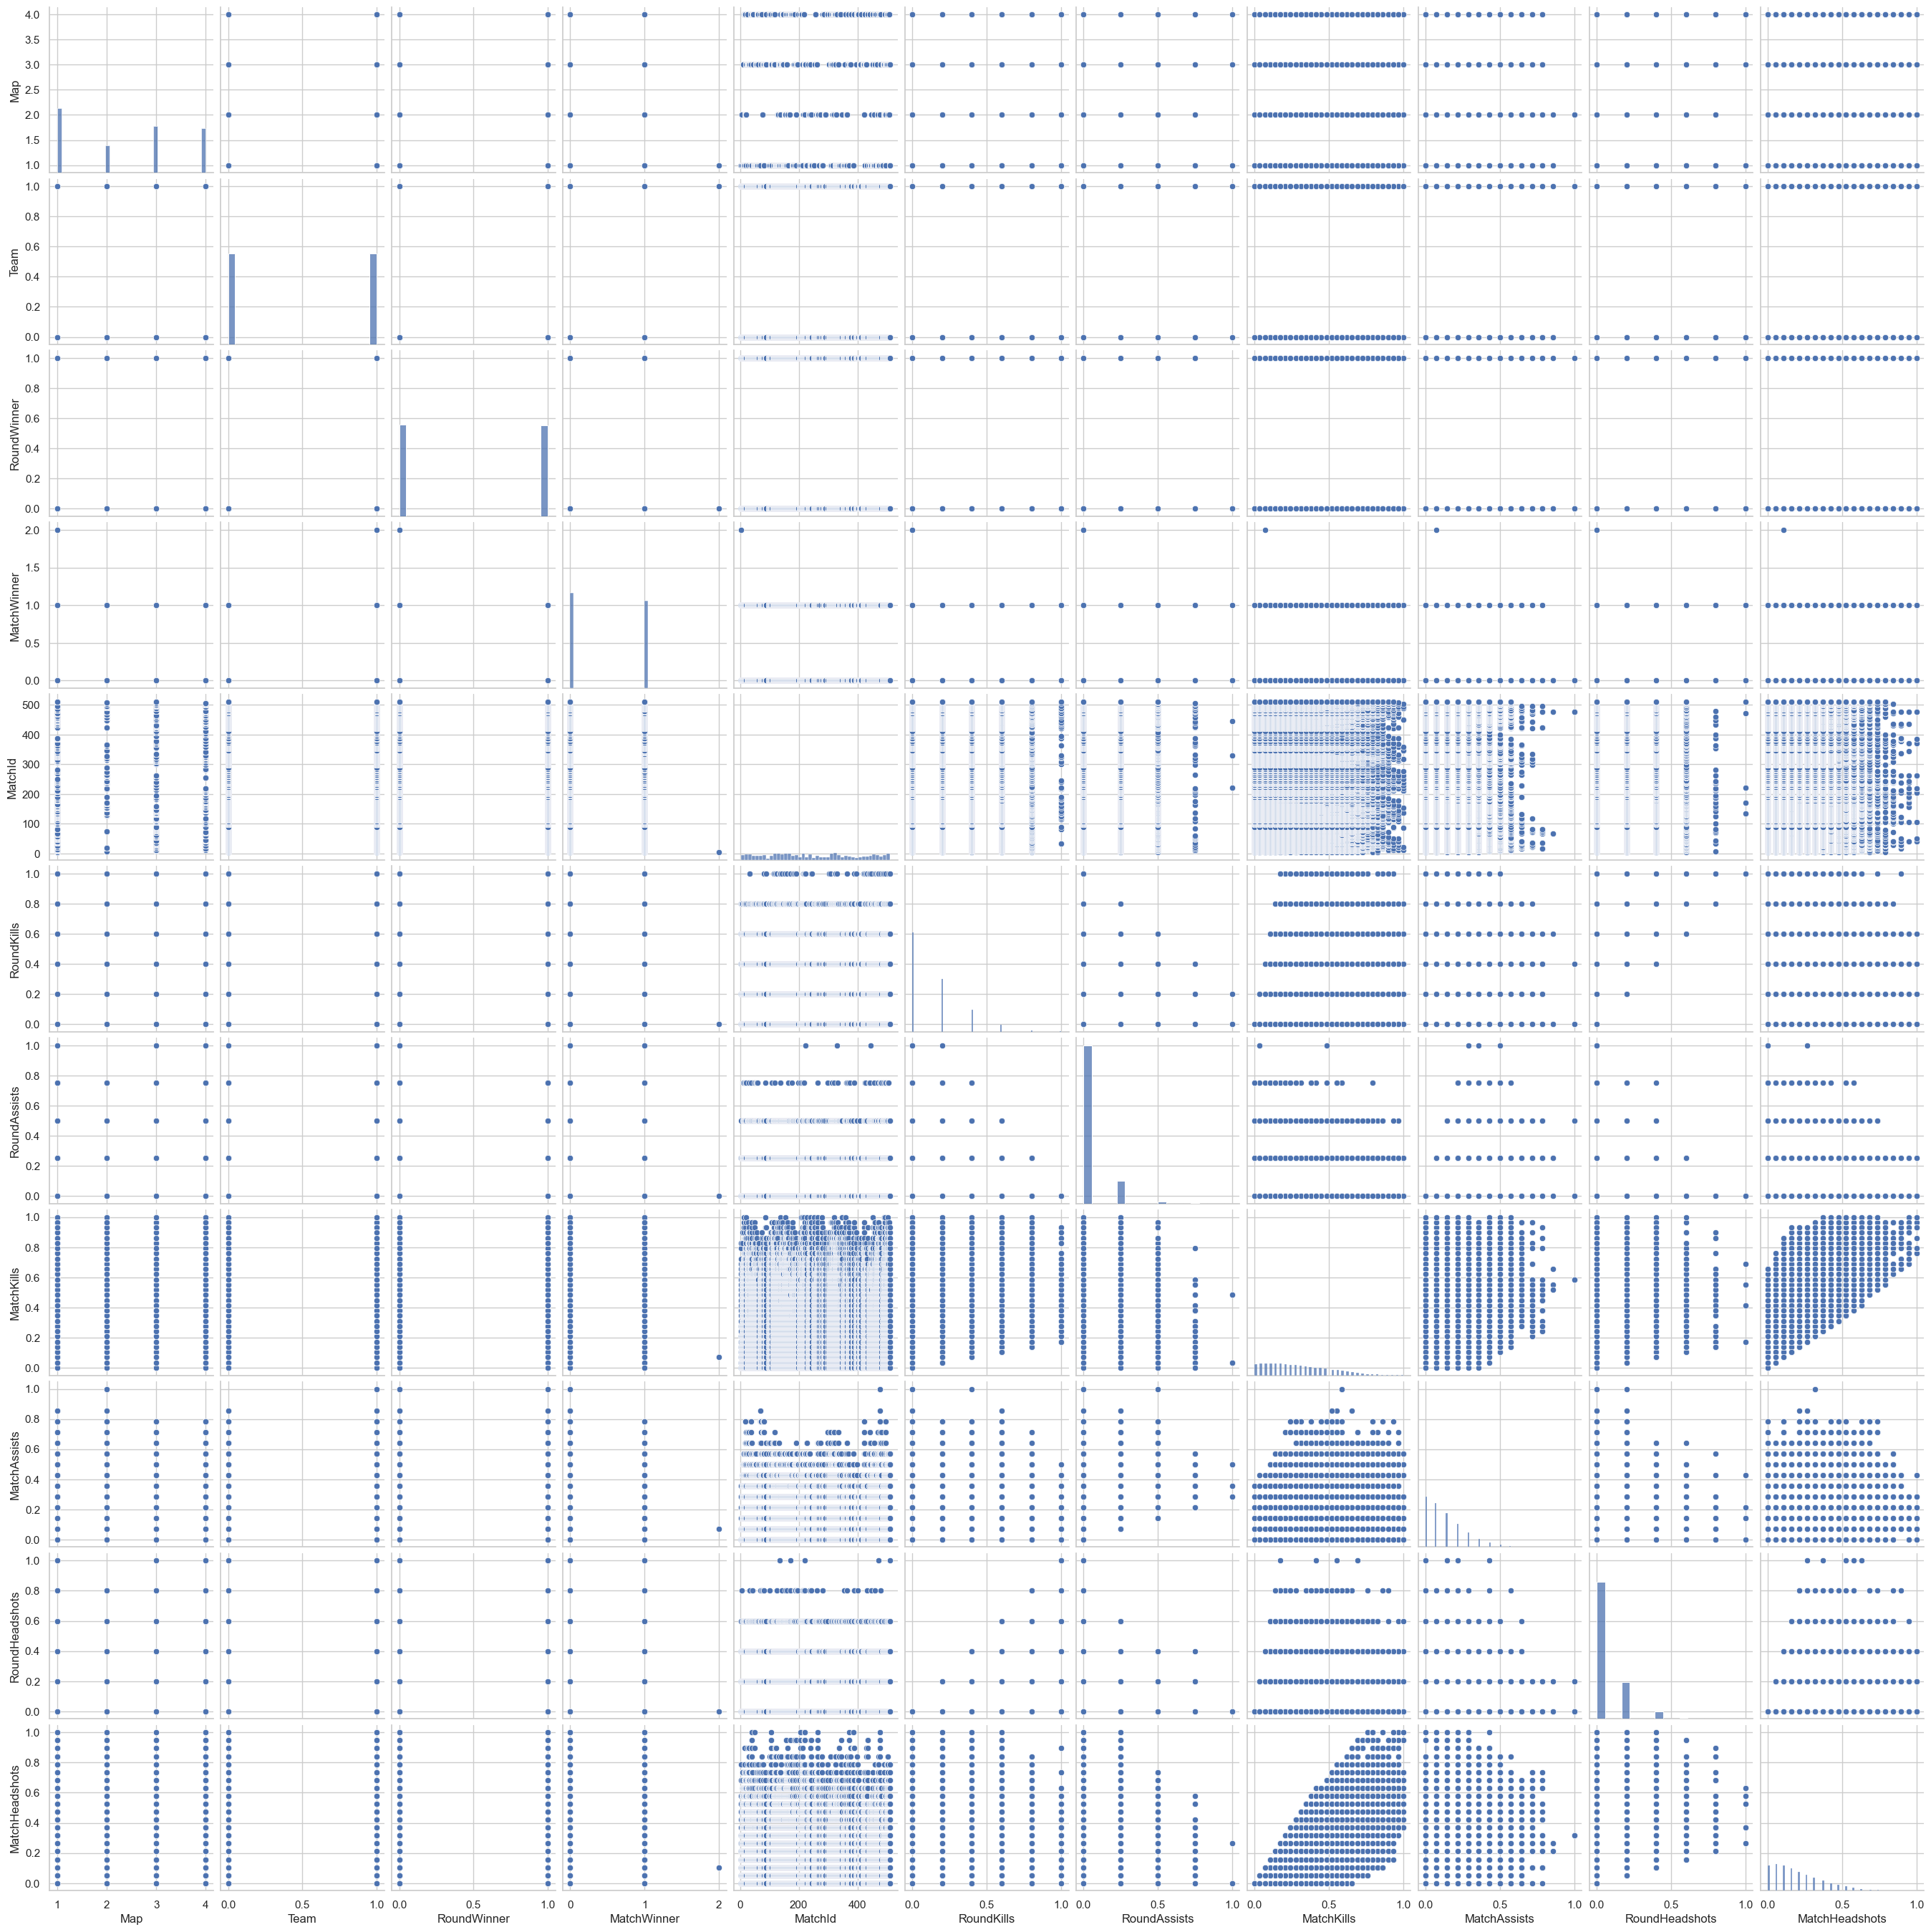

In [ ]:
sns.pairplot(df)

## Fase 4: Modeling

### Regresión

En este parte, ocuparemos 4 modelos de regresión (Regresión de Lasso, de Ridge, Gradient Boosting Regressor y Random Forest Regressor)

In [82]:
# Exploración de Datos
df.info()
df.describe()

# Crear nuevas características
#df['RoundAssists_per_RoundKills'] = df['RoundAssists'] / (df['RoundKills'] + 1e-9)
#df['MatchAssists_per_MatchKills'] = df['MatchAssists'] / (df['MatchKills'] + 1e-9)
#df['RoundHeadshots_per_RoundKills'] = df['RoundHeadshots'] / (df['RoundKills'] + 1e-9)
#df['MatchHeadshots_per_MatchKills'] = df['MatchHeadshots'] / (df['MatchKills'] + 1e-9)

# Llenar valores infinitos resultantes de divisiones por cero
df.replace([float('inf'), -float('inf')], 0, inplace=True)

# Seleccionar nuevas características junto con las anteriores
#X_new = df[['RoundKills', 'RoundHeadshots', 'MatchKills']]
#y_new = df['MatchHeadshots']
X_new = df[['MatchKills']]
y_new = df[['MatchHeadshots']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Función para evaluar el rendimiento del modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2



<class 'pandas.core.frame.DataFrame'>
Index: 69547 entries, 0 to 79156
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Map                            69547 non-null  int64  
 1   Team                           69547 non-null  int64  
 2   InternalTeamId                 69547 non-null  int64  
 3   RoundWinner                    69547 non-null  int64  
 4   MatchWinner                    69547 non-null  int64  
 5   Survived                       69547 non-null  int64  
 6   RoundId                        69547 non-null  int64  
 7   MatchId                        69547 non-null  int64  
 8   RoundKills                     69547 non-null  int64  
 9   RoundAssists                   69547 non-null  int64  
 10  MatchKills                     69547 non-null  int64  
 11  MatchAssists                   69547 non-null  int64  
 12  RoundHeadshots                 69547 non-null  int6

## Ridge Regression

In [83]:
# Inicializar y entrenar el modelo Ridge
ridge_model_new = Ridge(alpha=1.0)
ridge_model_new.fit(X_new, y_new)

# Evaluar el modelo Ridge
ridge_metrics_new = evaluate_model(ridge_model_new, X_new, y_new)

# Resultados del modelo Ridge
print(f"Ridge Regression - MSE: {ridge_metrics_new[0]:.2f}, MAE: {ridge_metrics_new[1]:.2f}, R²: {ridge_metrics_new[2]:.2f}")


Ridge Regression - MSE: 3.20, MAE: 1.29, R²: 0.69


## Lasso Regression

In [84]:
# Inicializar y entrenar el modelo Lasso
lasso_model_new = Lasso(alpha=1.0)
lasso_model_new.fit(X_new, y_new)

# Evaluar el modelo Lasso
lasso_metrics_new = evaluate_model(lasso_model_new, X_new, y_new)

# Resultados del modelo Lasso
print(f"Lasso Regression - MSE: {lasso_metrics_new[0]:.2f}, MAE: {lasso_metrics_new[1]:.2f}, R²: {lasso_metrics_new[2]:.2f}")


Lasso Regression - MSE: 3.23, MAE: 1.31, R²: 0.69


## Gradient Boosting Regressor

In [85]:
# Inicializar y entrenar el modelo Gradient Boosting
gbr_model_new = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model_new.fit(X_new, y_new)

# Evaluar el modelo Gradient Boosting
gbr_metrics_new = evaluate_model(gbr_model_new, X_new, y_new)

# Resultados del modelo Gradient Boosting
print(f"Gradient Boosting Regressor - MSE: {gbr_metrics_new[0]:.2f}, MAE: {gbr_metrics_new[1]:.2f}, R²: {gbr_metrics_new[2]:.2f}")


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boosting Regressor - MSE: 3.19, MAE: 1.28, R²: 0.69


## Random Forest Regressor

In [86]:
# Inicializar y entrenar el modelo Random Forest
rf_model_new = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf_model_new.fit(X_new, y_new)

# Evaluar el modelo Random Forest
rf_metrics_new = evaluate_model(rf_model_new, X_new, y_new)

# Resultados del modelo Random Forest
print(f"Random Forest Regressor - MSE: {rf_metrics_new[0]:.2f}, MAE: {rf_metrics_new[1]:.2f}, R²: {rf_metrics_new[2]:.2f}")


C:\Users\herna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Regressor - MSE: 3.19, MAE: 1.28, R²: 0.69


## Con Grid Search

In [87]:
# Función para evaluar el rendimiento del modelo
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, r2

# Definir los parámetros para el Grid Search de Gradient Boosting Regressor
gbr_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Realizar Grid Search para Gradient Boosting Regressor
gbr_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                               param_grid=gbr_param_grid,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1)
gbr_grid_search.fit(X_train_new, y_train_new.values.ravel())

# Mejor estimador y sus parámetros
best_gbr = gbr_grid_search.best_estimator_
best_gbr_params = gbr_grid_search.best_params_

# Evaluar el mejor modelo de Gradient Boosting
best_gbr_metrics = evaluate_model(best_gbr, X_test_new, y_test_new)

# Definir los parámetros para el Grid Search de Random Forest Regressor
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar Grid Search para Random Forest Regressor
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)
rf_grid_search.fit(X_train_new, y_train_new.values.ravel())

# Mejor estimador y sus parámetros
best_rf = rf_grid_search.best_estimator_
best_rf_params = rf_grid_search.best_params_

# Evaluar el mejor modelo de Random Forest
best_rf_metrics = evaluate_model(best_rf, X_test_new, y_test_new)

# Imprimir resultados
print(f"Mejores parámetros para Gradient Boosting: {best_gbr_params}")
print(f"Mejores métricas para Gradient Boosting: MSE={best_gbr_metrics[0]:.2f}, MAE={best_gbr_metrics[1]:.2f}, R²={best_gbr_metrics[2]:.2f}")

print(f"Mejores parámetros para Random Forest: {best_rf_params}")
print(f"Mejores métricas para Random Forest: MSE={best_rf_metrics[0]:.2f}, MAE={best_rf_metrics[1]:.2f}, R²={best_rf_metrics[2]:.2f}")


Mejores parámetros para Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mejores métricas para Gradient Boosting: MSE=3.21, MAE=1.28, R²=0.69
Mejores parámetros para Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejores métricas para Random Forest: MSE=3.21, MAE=1.28, R²=0.69


## Fase 5: Evaluation

### Análisis de Resultados de Modelos para Predicción en Análisis de Replay de un Juego de Disparos

#### Contexto
En este análisis, se busca predecir un resultado relevante en el contexto de un juego de disparos utilizando dos características principales: 'MatchKills' y 'MatchHeadshots'. Se evaluaron cuatro modelos de regresión y se optimizaron dos de ellos mediante Grid Search CV para mejorar su rendimiento. Los modelos evaluados son: Ridge Regression, Lasso Regression, Gradient Boosting Regressor y Random Forest Regressor.

#### Resultados de los Modelos

1. **Ridge Regression**
   - MSE (Error Cuadrático Medio): 3.20
   - MAE (Error Absoluto Medio): 1.29
   - R² (Coeficiente de Determinación): 0.69

2. **Lasso Regression**
   - MSE: 3.23
   - MAE: 1.31
   - R²: 0.69

3. **Gradient Boosting Regressor**
   - MSE: 3.19
   - MAE: 1.28
   - R²: 0.69

4. **Random Forest Regressor**
   - MSE: 3.19
   - MAE: 1.28
   - R²: 0.69

#### Resultados de la Optimización con Grid Search CV

**Gradient Boosting Regressor:**
   - Mejores Parámetros:
     - `learning_rate`: 0.1
     - `max_depth`: 3
     - `n_estimators`: 50
   - Mejores Métricas:
     - MSE: 3.21
     - MAE: 1.28
     - R²: 0.69

**Random Forest Regressor:**
   - Mejores Parámetros:
     - `max_depth`: None
     - `min_samples_leaf`: 1
     - `min_samples_split`: 2
     - `n_estimators`: 100
   - Mejores Métricas:
     - MSE: 3.21
     - MAE: 1.28
     - R²: 0.69

### Análisis y Comparación de Modelos

1. **Rendimiento General:**
   Todos los modelos presentaron métricas muy similares, lo que sugiere que las características 'MatchKills' y 'MatchHeadshots' tienen una relación consistente con la variable de salida en todos los métodos evaluados.

2. **Precisión de los Modelos:**
   - Todos los modelos tienen un R² de 0.69, lo que indica que aproximadamente el 69% de la variabilidad en la variable objetivo se explica por las características utilizadas. Este es un buen indicador de que los modelos están capturando bien las relaciones subyacentes en los datos.
   - El MSE y el MAE son prácticamente iguales entre todos los modelos, con pequeñas diferencias que no son estadísticamente significativas.

3. **Eficiencia del Modelo:**
   - **Gradient Boosting Regressor** y **Random Forest Regressor** tienen los MSE y MAE más bajos (3.19 y 1.28 respectivamente), lo que los hace ligeramente mejores en términos de precisión, aunque la diferencia es mínima.
   - La optimización con Grid Search CV para ambos modelos no resultó en mejoras significativas en las métricas, lo que sugiere que los parámetros por defecto ya estaban bien ajustados para este conjunto de datos.

4. **Simplicidad vs Complejidad:**
   - **Ridge Regression** y **Lasso Regression** son modelos lineales más simples y fáciles de interpretar, mientras que **Gradient Boosting** y **Random Forest** son modelos más complejos que pueden capturar relaciones no lineales.
   - A pesar de la complejidad, los modelos avanzados no proporcionaron una mejora significativa en las métricas, lo que podría indicar que las relaciones en los datos son predominantemente lineales o que las características disponibles son limitadas en su capacidad de mejorar el modelo.

### Conclusiones

1. **Elección del Modelo:**
   Dada la similitud en el rendimiento de los modelos, la elección puede depender de otros factores como la interpretabilidad, el tiempo de entrenamiento y la facilidad de implementación. Para aplicaciones donde la interpretabilidad es crucial, **Ridge Regression** o **Lasso Regression** serían preferibles. En escenarios donde la precisión es ligeramente más importante, **Gradient Boosting Regressor** o **Random Forest Regressor** pueden ser elegidos.

2. **Mejoras Futuras:**
   - **Ingeniería de Características:** Explorar y añadir nuevas características que puedan capturar mejor la variabilidad en la variable objetivo.
   - **Modelos Avanzados:** Considerar modelos más avanzados como redes neuronales si se dispone de un mayor conjunto de datos y capacidad computacional.
   - **Validación y Regularización:** Continuar ajustando y validando los modelos con técnicas de regularización y validación cruzada para asegurar la generalización del modelo.


## Fase 6: Deployment

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Realizar despliegue del modelo